In [1]:
#%% Imports
import os
import numpy as np
import spectral
import matplotlib.pyplot as plt
from skimage import exposure, io

from scipy import stats
from sklearn.linear_model import LinearRegression

# Import "local" packages
import hyspec_io, image_render, preprocess 

In [2]:
#%% Paths
train_raw_file = '/media/mha114/Massimal/Larvik_Olberg/Hyperspectral/20210825/OlbergAreaS/Raw/OlbergholmenS-21/OlbergholmenS_Pika_L_21.bil.hdr'
train_file = '/media/mha114/Massimal/Larvik_Olberg/Hyperspectral/20210825/OlbergAreaS/Radiance/OlbergholmenS_Pika_L_21-Radiance From Raw Data.bip.hdr'
test_file = '/media/mha114/Massimal/Larvik_Olberg/Hyperspectral/20210825/OlbergAreaS/Radiance/OlbergholmenS_Pika_L_17-Radiance From Raw Data.bip.hdr'

In [3]:
#%% Parameters
nir_band = (780,840)   # Indices for upper and lower wavelengths in NIR band
vis_band = (350,750)   # Indices for upper and lower wavelengths in VIS band

In [6]:
#%% Import data
(im_train_raw,wl,rgb_ind,metadata) = hyspec_io.load_envi_image(train_raw_file)
(im_train,wl,rgb_ind,metadata) = hyspec_io.load_envi_image(train_file)
(im_test,wl,rgb_ind,metadata) = hyspec_io.load_envi_image(test_file)

wl, rgb_ind and metadata are overwritten at each new import. Only the data for the test file is retained.

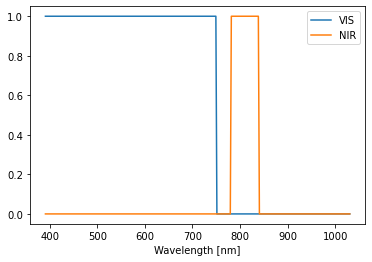

In [7]:
#%% Calc VIS and NIR indices
vis_ind = (wl >= vis_band[0]) & (wl <= vis_band[1])
nir_ind = (wl >= nir_band[0]) & (wl <= nir_band[1])
plt.plot(wl,vis_ind,label='VIS')
plt.plot(wl,nir_ind,label='NIR')
plt.xlabel('Wavelength [nm]')
plt.legend()
plt.show()

In [8]:
# Extract images based on indices
im_train_vis = im_train[:,:,vis_ind]
im_train_nir = np.mean(im_train[:,:,nir_ind],axis=2)   # Average to improve SNR

im_test_vis = im_test[:,:,vis_ind]
im_test_nir = np.mean(im_test[:,:,nir_ind],axis=2)   # Average to improve SNR

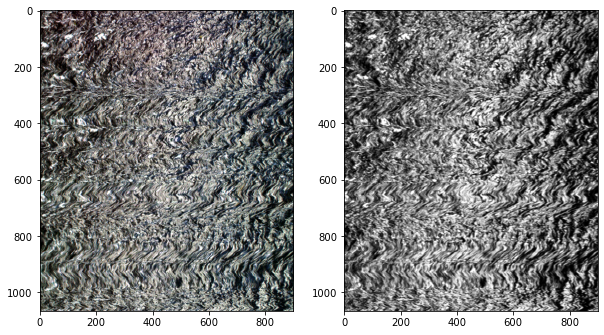

In [10]:
#%% Show RGB and NIR images 
fig,ax = plt.subplots(ncols=2,figsize=(10,12))
ax[0].imshow(image_render.percentile_stretch(im_train[:,:,rgb_ind]))
ax[1].imshow(image_render.percentile_stretch(im_train_nir,separate_bands = False),cmap='gray')

In [11]:
#%% Detect saturated pixels in training data
sat_pix_mask = preprocess.detect_saturated(im_train_raw)
print('Number of saturated pixels: ' + str(np.count_nonzero(sat_pix_mask)))

Number of saturated pixels: 66


In [12]:
#%% Extract non-saturated VIS pixels
train_vis = im_train_vis[~sat_pix_mask]
train_vis.shape

(959334, 173)

In [13]:
#%% Extract all non-saturated NIR pixel values
train_nir = im_train_nir[~sat_pix_mask]
train_nir = train_nir.reshape(-1,1)    # Reshape from 1D to 2D (single column), needed for linear regression
print(train_nir.shape)

(959334, 1)


In [14]:
#%% Fit a multi-output linear regression model using NIR as X and each individual VIS channel as y
reg = LinearRegression().fit(train_nir, train_vis)

In [15]:
#%% Set intercepts to zero
reg.intercept_ = np.zeros(reg.intercept_.shape)

In [16]:
#%% Get NIR data from test image
test_nir = im_test_nir.reshape((-1,1))
test_nir.shape

(1800000, 1)

In [17]:
test_glint = reg.predict(test_nir)
test_glint.shape

(1800000, 173)

In [18]:
im_test_noglint = im_test_vis - test_glint.reshape(im_test_vis.shape)
im_test_noglint = im_test_noglint     # Add small constant to avoid negative values...

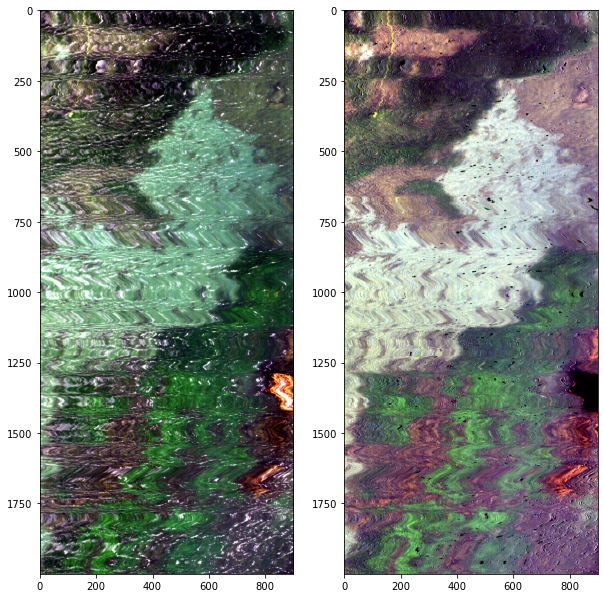

In [19]:
#%% Show original and glint corrected image
fig,ax = plt.subplots(ncols=2,figsize=(10,12))
ax[0].imshow(image_render.percentile_stretch(im_test[:,:,rgb_ind]))
ax[1].imshow(image_render.percentile_stretch(im_test_noglint[:,:,rgb_ind]))

In [53]:
#%% Save file
tmp = metadata['wavelength']
type(tmp)

list

In [58]:
np.where(vis_ind)
tmp2 = 

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172]),)